This notebook shows a simple example of profiling alternative methods of concatenating two pandas DataFrames.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import cProfile

from pstatsviewer import StatsViewer
import qgrid

#please enable qgrid nbextension as following
#jupyter nbextension enable --py --sys-prefix qgrid
#jupyter nbextension enable --py --sys-prefix widgetsnbextension

##nbinstall method no longer available
##from qgrid import nbinstall
##nbinstall()

In [2]:
# Construct two 5000 x 8 frames with random floats.
df1 = pd.DataFrame(
    np.random.randn(5000, 8),
    columns=[chr(ord('A') + i) for i in range(8)],
    index=range(5000),
)

df2 = pd.DataFrame(
    np.random.randn(5000, 8),
    columns=[chr(ord('A') + i) for i in range(8)],
    index=range(5000, 10000),
)

df1.head(5)

,A,B,C,D,E,F,G,H
0,-0.385520,-0.049070,-0.466838,0.365557,0.647840,-0.516176,-1.263354,-0.118584
1,0.058187,-0.984139,0.574249,-0.754017,0.801880,2.051337,-1.792048,-0.550779
2,0.003381,0.326041,-0.973417,-1.384903,1.007778,-0.864575,2.229019,0.526847
3,-0.334418,-0.725499,-0.484224,-0.478082,-0.040173,2.185536,0.830197,0.477510
4,-1.334214,-0.106231,-1.295093,-0.859301,1.090795,0.244422,1.197532,0.642029


In [3]:
from qgrid import show_grid

## Generating stats files with cProfile:

In [4]:
def concat_naive():
    for i in range(500):
        pd.concat([df1, df2])
        
cProfile.run(
    'concat_naive()',
    'naive.stats',
)

## Table/Grid View

Provides interactive support for:
- Scrolling
- Filtering
- Sorting
- Resizing Columns

In [5]:
slow = StatsViewer("naive.stats")
slow.table()
#w = slow.table()
#qgrid.show_grid(w.df, show_toolbar=True)


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## Chart View

Supports interactive generation of charts parameterized by no. of functions and sort order.

In [6]:
slow.chart()

interactive(children=(IntSlider(value=20, description='count', min=5, step=5), Dropdown(description='sort_by',…

In [7]:
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets
def f(x):
    return x
#interact(f, x=10);
interact(f, x=IntSlider(min=5, max=100, step=5, value=20))

interactive(children=(IntSlider(value=20, description='x', min=5, step=5), Output()), _dom_classes=('widget-in…

<function __main__.f(x)>

## Comparing Alternative Implementations

In [8]:
def concat_fast():
    """
    Concatenate using numpy primitives instead of pd.concat.
    """
    for i in range(500):
        pd.DataFrame(
            np.vstack([df1.values, df2.values]),
            columns=df1.columns,
            index=np.hstack([
                df1.index.values,
                df2.index.values,
            ])
        )

cProfile.run(
    'concat_fast()',
    'fast.stats',
)
fast = StatsViewer("fast.stats")

## Comparison View

Both `chart` and `grid` support comparison versions.

In [9]:
slow.compare_table(fast, lsuffix="_slow", rsuffix="_fast")

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

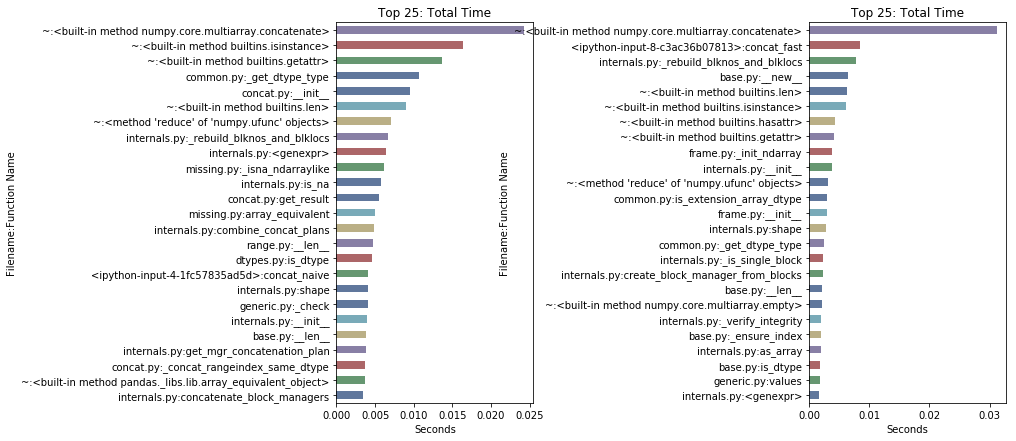

In [10]:
slow.compare_chart(fast, 'tottime', 25)

##How do it do it?

- cProfile output is loaded into a pandas `DataFrame`
- Chart View is implemented with IPython widget delegating to http://github.com/mwaskom/seaborn.
- Table View is implemented with http://github.com/quantopian/qgrid:
  - Built on top of IPython widgets and http://github.com/mleibman/SlickGrid.